# PMR3404 - Controle I
# Experiência 4: Projeto de controladores no domínio da frequência

# Identificação

**Aluno : Bruno Scaglione**           **NUSP: 10335812**

**Turma de Laboratório: 2**

**Professor: Newton**

**OBSERVAÇÕES:**

1. Você deve submeter o seu relatório num único arquivo compactado contendo o seu arquivo formato jupyter notebook .ipynb com todas as células dos scripts executadas para verificação,
2. Todos os gráficos devem ser na versão final do tipo inline para permanecer na célula de execução. Não será necessário colocar os gráficos na área de Markdown,
3. As células são interdependentes, ou seja, é necessário a execução das células de maneira sequencial pois a execução dos scripts de cada exercício depende de valores de variáveis de células anteriores.


# Exercício 1: Projeto com controlador avanço de fase

O controlador por avanço de fase pode ser escrito através da seguinte equação:
$$
G_c(s) = K_c \alpha\frac{Ts+1}{\alpha Ts+1} = K_c \frac{s+\frac{1}{T}}{s+\frac{1}{\alpha T}}
$$

Um diagrama de Bode para $K_c=1$ e $\alpha=0.1$ é ilustrado abaixo:

<img src="./Figuras/leadcontrol.png" width="50%" height="50%"/>

Seja o seguinte sistema:
$$
G(s) = \frac{4}{s(\frac{5}{2}s+1)(\frac{1}{6}s+1)}
$$

O sistema de controle em malha fechada correspondente é ilustrado na figura abaixo:

<img src="./Figuras/cloop.png" width="30%" height="30%"/>

Esse sistema é estável como pode ser visto no diagrama de Bode de malha aberta entretanto as margens de estabilidade são bem pequenas. A resposta a degrau unitário enfatiza esse aspecto pelo comportamento bastante oscilatório.

<img src="./Figuras/bodeleadinicial1.png" width="40%" height="40%"/>

<img src="./Figuras/respostadegrauiniciallead1.png" width="40%" height="40%"/>

Para esse sistema projete um controlador avanço de fase que atenda às seguintes especificações:
- Constante de erro de velocidade $K_v=10$,
- Margem de Ganho $G_m \ge 10$dB,
- Margem de Fase $P_m \ge 30^o$.

## Passo 1: Ajuste da constante de erro de velocidade estático

Seja $G_1(s)=KG(s)$
Determinar o valor de $K$ que atende o requisito da constante de erro estático de velocidade $K_v$:
$$
K_v=\lim_{s\rightarrow 0}sG_c(s)G(s) =
$$

$$
K = 2,5
$$


In [4]:
K= 2.5
print("K = ",K)

K =  2.5


In [5]:
!pip install control

## Passo 2:

Utilizando o valor de $K$ obtido no passo 1 obtenha o diagrama de Bode para $G_1(j\omega)$. 

verifique no diagrama de Bode a Margem de Ganho $G_m$, a frequência de crossover de ganho $\omega_{cg}$, a Margem de Fase $P_m$ do sistema compensado $G_c(s)G(s)$, a frequência de crossover de fase $\omega_{cp}$ e preencha a tabela abaixo:

|$G_m$ | $\omega_{cg}$ | $Pm$ | $\omega_{cp}$ |
|:--|:--|:--|:--|
| -3.88 dB | 1.93 rad/s | -6.14 graus| 1.55 rad/s |

**Obs: utilize o script abaixo.**

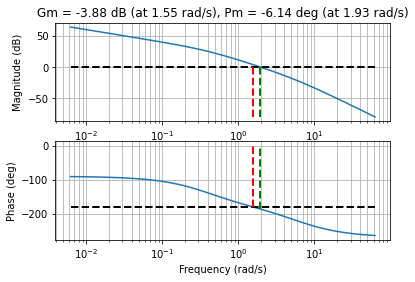

In [6]:
# inline para graficos sem interacao
# qt para grafico em janela separada com interacao (melhora visualizacao)
%matplotlib inline
#%matplotlib qt
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
s=co.tf('s')
#
# Sistema
G = 4/(s*((5/2)*s+1)*((1/6)*s+1))
G1 = K*G
#
# Utiliza a funcao bode mas sem display grafico
# Aproveita informacoes de modulo, fase e frequencia angular
# Geracao da escala da frequencia angular rad/s
omega = np.logspace(0,2,num=100,base=10)
mag,phase,omega = co.bode(G1,dB=True,Plot=False)
# Converte para dB e graus
magdB = 20*np.log10(mag)
phase_deg = phase*180.0/np.pi
# Utiliza a funcao margin() que calcula
# As margens de estabilidade com suas respetivas freq. de crossover
Gm,Pm,Wcg,Wcp = co.margin(G1)
GmdB = 20*np.log10(Gm)

##Plot Gain and Phase
f, (ax1,ax2) = plt.subplots(2,1)
ax1.semilogx(omega,magdB)
ax1.grid(which="both")
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax2.semilogx(omega,phase_deg)
ax2.grid(which="both")
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')
ax1.set_title('Gm = '+str(np.round(GmdB,2))+' dB (at '+str(np.round(Wcg,2))+' rad/s), Pm = '+str(np.round(Pm,2))+' deg (at '+str(np.round(Wcp,2))+' rad/s)')
###Plot the zero dB line
ax1.plot(omega,0*omega,'k--',lineWidth=2)
###Plot the -180 deg lin
ax2.plot(omega,-180+0*omega,'k--',lineWidth=2)
##Plot the vertical line from -180 to 0 at Wcg
ax2.plot([Wcg,Wcg],[-180,0],'r--',lineWidth=2)
##Plot the vertical line from -180+Pm to 0 at Wcp
ax2.plot([Wcp,Wcp],[-180+Pm,0],'g--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0-GmdB at Wcg
ax1.plot([Wcg,Wcg],[np.min(magdB),0-GmdB],'r--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0db at Wcp
ax1.plot([Wcp,Wcp],[np.min(magdB),0],'g--',lineWidth=2)


## Passo 3:

Determinar o ângulo de fase $\Phi_m$ que deve ser adicionado para atender à especificação de projeto.

Calcula-se a diferença entre a atual margem de fase $Pm_a$ e a margem de fase mínima especificada pelo projeto $Pm_c$.
**Obs: Usualmente adiciona-se $5^o$ à esse valor já que o ponto de crossover de fase $\omega_{cp}$ se desloca para direita. Se for desejado uma margem de fase maior que o mínimo especificado o valor do ângulo de fase $\Phi_m$ deve ser aumentado.**

**Utilizei $15^o$ como delta, pois $5^o$ não era o suficiente para compensar o deslocamento de $\omega_{cp}$**

$$
\Phi_m = 51.14^o
$$


## Passo 4:

Dado o ângulo de fase máximo que se deseja acrescentar $\Phi_m$, o parâmetro $\alpha$ pode ser calculado através da seguinte equação:
$$
\sin \Phi_m = \frac{1-\alpha}{1+\alpha},
$$
ou ainda:
$$
\alpha = \frac{1-\sin \Phi_m}{1+\sin \Phi_m} = 0.12
$$

**Obs: utilize o script abaixo.**

In [7]:
import numpy as np
phim = 51.14  # insira o valor do angulo aqui, unidade em graus
# funcao seno so admite angulo em rad
senophim = np.sin(np.radians(phim))
alpha = (1-senophim)/(1+senophim)
print("alpha = ",round(alpha,2)) # Arredonda para 2 casas decimais

alpha =  0.12


**Continuação passo 4:**

Determinar a frequência angular $\omega_m$ que corresponde ao ponto onde o controlador tem o maior avanço de fase $\Phi_m$.

Sabemos que a seguinte equação pode ser utilizada:
$$
\omega_m = \frac{1}{\sqrt{\alpha}T},
$$
no entanto não sabemos ainda o valor de $T$. Obs: o zero do controlador é definido por $s=-1/T$ e o pólo $s=-1/\alpha T$.

$$
\left| \frac{1+j\omega T}{1+j\alpha T} \right|_{\omega=\omega_m}=\frac{1}{\sqrt{\alpha}}
$$
ou em dB:
$$
20 \log \left( \frac{1}{\sqrt{\alpha}} \right) = 9.05
$$
**Obs: utilize o script abaixo**

Procura-se agora no diagrama de Bode do módulo de $G_1(j\omega)$ a frequência angular $\omega$ onde o módulo é igual a:
$$
|G_1(j\omega)|= -20 \log \left( \frac{1}{\sqrt{\alpha}} \right)
$$

Essa frequência que corresponde ao maior avanço de fase do controlador é também a nova frequência de crossover:

Fiz pelo matlab essa parte
$$
\omega_c = 3.155 rad/s
$$

In [8]:
print("20 log(1/sqrt(alpha)) =",round(20*np.log10(1/np.sqrt(alpha)),2))

20 log(1/sqrt(alpha)) = 9.05


## Passo 5: Cálculo das frequências de canto

Sabendo o valor de $\omega_m$ e $\alpha$ podemos o valor das frequências de canto (pólo e zero) do controlador através das seguintes equações:

$$
\frac{1}{T}=\sqrt{\alpha}\omega_c = 1.11 rad/s
$$ 

$$
\frac{1}{\alpha T}=\frac{\omega_c}{\sqrt{\alpha}} = 8.94 rad/s
$$

**Obs: utilize o script abaixo:**

In [9]:
# a variavel alpha deve estar definida na celula acima
# coloque aqui o valor escolhido
omegac = 3.155
T=1/round(np.sqrt(alpha)*omegac,2)
print("1/T = ",1/T)
print("1/(alpha T) = ",round(omegac/np.sqrt(alpha),2))

1/T =  1.11
1/(alpha T) =  8.94


## Passo 6: Cálculo de $K_c$:
$$
K_c=\frac{K}{\alpha}
$$

Podemos escrever agora:
$$
G_c(s) = K_c\alpha \frac{Ts+1}{\alpha Ts+1}= \frac{2.252s + 2.5}{0.1121s + 1}
$$

In [10]:
Kc = K/alpha
print("Kc = ", round(K/alpha,2))
Gc= Kc * alpha * ((T*s+1)/(alpha*T*s+1))
print("Gc = ",Gc)

Kc =  20.09
Gc =  
2.252 s + 2.5
-------------
0.1121 s + 1



## Passo 7: Verificação do projeto

a) Domínio da frequência:

Para observar o resultado no domínio da frequência colocaremos em um único gráfico o Diagrama de Bode de 3 sistemas:
1. $G_1(s)=KG(s)$: a margem de fase é inicialmente medida nesse sistema,
2. $G_c(s)/K$: o ganho de compensação na frequência de crossover é medido nesse sistema,
3. $Gc(s)G(s)$: sistema compensado.

**Obs: utilize o script abaixo**

verifique no diagrama de Bode a Margem de Ganho $G_m$, a frequência de crossover de ganho $\omega_{cg}$, a Margem de Fase $P_m$ do sistema compensado $G_c(s)G(s)$, a frequência de crossover de fase $\omega_{cp}$ e preencha a tabela abaixo:

|$G_m$ | $\omega_{cg}$ | $Pm$ | $\omega_{cp}$ |
|:--|:--|:--|:--|
| 10.39 | 3.16 | 30.58 | 6.56 |

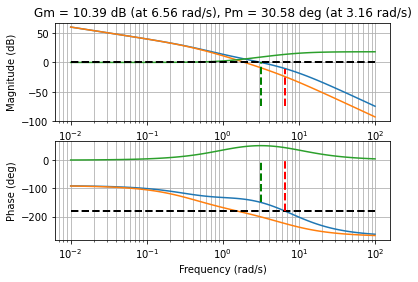

In [11]:
# inline para graficos sem interacao
# qt para grafico em janela separada com interacao (melhora visualizacao)
%matplotlib inline
#%matplotlib qt
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
s=co.tf('s')
#
# Sistema
# G1 ja deve estar definido nas celulas acima
#
# Controlador Gck = Gc/K
# Gc e K ja devem estar definidos
#
Gck = Gc/K
#
# Malha aberta
openloop = Gc*G
#
# Geracao da escala da frequencia angular rad/s
# 10**fi ---> 10**ff
fi=-2
ff=2
omega = np.logspace(fi,ff,num=100,base=10)
# Utiliza a funcao bode mas sem display grafico
# Aproveita informacoes de modulo, fase
# a escala omega e' imposta 
mag,phase,omega1 = co.bode(openloop,omega,dB=True,Plot=False)
# Converte para dB e graus
magdB = 20*np.log10(mag)
phase_deg = phase*180.0/np.pi
#
# Utiliza a funcao margin() que calcula
# as margens de estabilidade com suas respetivas freq. de crossover
# de Gc(s)G(s)=openloop
Gm,Pm,Wcg,Wcp = co.margin(openloop)
# Converte para dB
GmdB = 20*np.log10(Gm)
#
# Diagrama de Bode de G1
#
magg1,phaseg1,omega1 = co.bode(G1,omega,dB=True,Plot=False)
# Converte para dB e graus
magg1dB = 20*np.log10(magg1)
phaseg1_deg = phaseg1*180.0/np.pi
#
# Diagrama de Bode de Gc(s)/K
#
maggck,phasegck,omega1 = co.bode(Gck,omega,dB=True,Plot=False)
# Converte para dB e graus
maggckdB = 20*np.log10(maggck)
phasegck_deg = phasegck*180.0/np.pi
#
# Coloca tudo no grafico
# G1(s), Gc(s)/K, Gc(s)G(s)
#
f, (ax1,ax2) = plt.subplots(2,1)
ax1.semilogx(omega,magdB,omega,magg1dB,omega,maggckdB)
ax1.grid(which="both")
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax2.semilogx(omega,phase_deg,omega,phaseg1_deg,omega,phasegck_deg)
ax2.grid(which="both")
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')
ax1.set_title('Gm = '+str(np.round(GmdB,2))+' dB (at '+str(np.round(Wcg,2))+' rad/s), Pm = '+str(np.round(Pm,2))+' deg (at '+str(np.round(Wcp,2))+' rad/s)')
#
# linhas auxiliares no grafico
#
###Plot the zero dB line
ax1.plot(omega,0*omega,'k--',lineWidth=2)
###Plot the -180 deg lin
ax2.plot(omega,-180+0*omega,'k--',lineWidth=2)
##Plot the vertical line from -180 to 0 at Wcg
ax2.plot([Wcg,Wcg],[-180,0],'r--',lineWidth=2)
##Plot the vertical line from -180+Pm to 0 at Wcp
ax2.plot([Wcp,Wcp],[-180+Pm,0],'g--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0-GmdB at Wcg
ax1.plot([Wcg,Wcg],[np.min(magdB),0-GmdB],'r--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0db at Wcp
ax1.plot([Wcp,Wcp],[np.min(magdB),0],'g--',lineWidth=2)

## Continuação passo 7:

**b) Domínio do tempo**

Para o domínio do tempo será comparado o sistema inicial $G(s)$ e o sistema compensado
$G_c(s)G(s)$ ambos em malha fechada:

$$
\frac{Y(s)}{R(s)}=\frac{G(s)}{1+G(s)}
$$
e
$$
\frac{Y(s)}{R(s)}=\frac{Gc(s)G(s)}{1+G_c(s)G(s)}
$$

b-1) Resposta a degrau unitário:

**Obs: utilize o script abaixo**

Anote na tabela a seguir as grandezas tempo de subida $t_r$, tempo de acomodação $t_s$, máximo sobresinal $M_p$ e valor máximo de esforço de controle $\max u(t)$ (Estimar o valor pelo gráfico).

|Sistema | $t_r$ | $t_s$ | $M_p$ | $$\max u(t)$$ |
|:--|:--|:--|:--|:--|
| $$\frac{G(s)}{1+G(s)}$$ |0.91 seg|54.06 seg|82.29|1.25|
| $$\frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$ |0.34 seg| 3.15 seg |48.51|20|

- Compare as duas soluções.

**O sistema compensado reage mais rapidamente, estabiliza mais rápido e oscila com menor amplitude, uma resposta transiente significativamente melhor. Porém ao custo de aumentar bastante o esforço de controle na reação à mudança do setpoint. Isso pode exigir bastante do atuador.**



POLOS E ZEROS DE MALHA FECHADA
-------------
Polos e zeros cloop1
Polos =  [-6.2615623 +0.j         -0.06921885+1.23627361j -0.06921885-1.23627361j]
Zeros =  []
COEF. DE AMORTECIMENTO E FREQ. NATURAL
_____Polos____________zeta_______omegan
_____Eigenvalue______ Damping___ Frequency_
    -6.262                     1      6.262
  -0.06922    +1.236j     0.0559      1.238
  -0.06922    -1.236j     0.0559      1.238

POLOS E ZEROS DE MALHA FECHADA
-------------
Polos e zeros cloop2
Polos =  [-11.65949837+0.j          -1.16011802+3.51380426j
  -1.16011802-3.51380426j  -1.34105196+0.j        ]
Zeros =  [-1.11]
COEF. DE AMORTECIMENTO E FREQ. NATURAL
_____Polos____________zeta_______omegan
_____Eigenvalue______ Damping___ Frequency_
    -11.66                     1      11.66
     -1.16    +3.514j     0.3135        3.7
     -1.16    -3.514j     0.3135        3.7
    -1.341                     1      1.341
-------------
CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop1
tempo de subida 

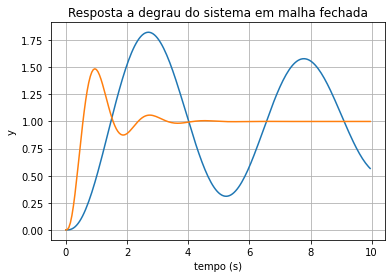

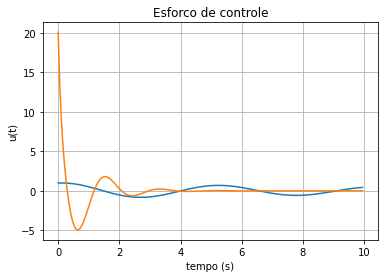

In [12]:
# inline para graficos sem interacao
# qt para grafico em janela separada com interacao
%matplotlib inline
#%matplotlib qt
#
# R(s)  E(s |------|  Y(s)
#---->(+)---| G(s) |------->
#    _ ^    |------|    |
#      |-----------------
#
# R(s)  E(s)|-------|  |------|  Y(s)
#---->(+)---| Gc(s) |--| G(s) |------->
#    _ ^    |-------|  |------|    |
#      |--------------------------- 
#
cloop1 = co.feedback(G,1)
print('\nPOLOS E ZEROS DE MALHA FECHADA')
print('-------------')
print('Polos e zeros cloop1')
print('Polos = ',co.pole(cloop1))
print('Zeros = ',co.zero(cloop1))
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop1)
cloop2 = co.feedback(Gc*G,1)
print('\nPOLOS E ZEROS DE MALHA FECHADA')
print('-------------')
print('Polos e zeros cloop2')
print('Polos = ',co.pole(cloop2))
print('Zeros = ',co.zero(cloop2))
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop2)
# base de tempo t
plt.figure(1)
t=[x*0.05 for x in range(0,200)]
y1, t = co.step(cloop1,t)
y2, t = co.step(cloop2,t)
plt.plot(t,y1,t,y2)
plt.title('Resposta a degrau do sistema em malha fechada')
plt.xlabel('tempo (s)')
plt.ylabel('y')
plt.grid()
# Calcula as caracteristicas da resposta transitoria
#  stepinfo(sys, T=None, SettlingTimeThreshold=0.02, RiseTimeLimits=(0.1,0.9))
#  S: a dictionary containing:
#        RiseTime: Time from 10% to 90% of the steady-state value.
#        SettlingTime: Time to enter inside a default error of 2%
#        SettlingMin: Minimum value after RiseTime
#        SettlingMax: Maximum value after RiseTime
#        Overshoot: Percentage of the Peak relative to steady value
#        Undershoot: Percentage of undershoot
#        Peak: Absolute peak value
#        PeakTime: time of the Peak
#        SteadyStateValue: Steady-state value
S1 = co.stepinfo(cloop1)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop1')
print('tempo de subida tr = ','%.2f' % S1['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % S1['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',S1['Overshoot'])
print('valor de pico ymax = ','%.2f' % S1['Peak'])
print('instante de pico tp = ','%.2f' % S1['PeakTime'],'seg')
print('valor de regime estacionario yss = ','%.2f' % S1['SteadyStateValue'])
S2 = co.stepinfo(cloop2)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop2')
print('tempo de subida tr = ','%.2f' % S2['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % S2['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',S2['Overshoot'])
print('valor de pico ymax = ','%.2f' % S2['Peak'])
print('instante de pico tp = ','%.2f' % S2['PeakTime'],'seg')
print('valor de regime estacionario yss = ','%.2f' % S2['SteadyStateValue'])
# Esforco de controle
esforco1 = co.feedback(1,G)
esforco2 = co.feedback(Gc,G)
vp1, t = co.step(esforco1,t)
vp2, t = co.step(esforco2,t)
plt.figure(2)
plt.plot(t,vp1,t,vp2)
plt.title('Esforco de controle')
plt.xlabel('tempo (s)')
plt.ylabel('u(t)')
plt.grid()

b-2) Resposta a rampa:

**Obs: utilize o script abaixo**

- O erro estático $e_{ss}$ não é nulo. Justifique.

**O sistema teria que ter dois polos na origem para ter $e_{ss}$ nulo para uma entrada em rampa. Pois com um pólo na origem apenas, $K_v$ assume um valor real constante, nesse exercício $K_v$ = 10. Logo  $e_{ss} = \frac{1}{10}$**


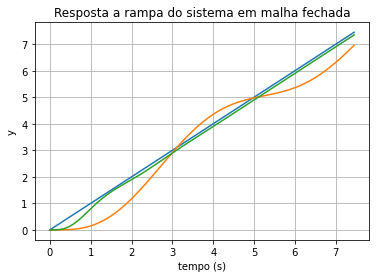

In [13]:
# inline para graficos sem interacao
# qt para grafico em janela separada com interacao
%matplotlib inline
#%matplotlib qt
# Calculo da resposta a rampa
t=[x*0.05 for x in range(0,150)]
u = t.copy()
y1, tempo, x1 = co.lsim(cloop1,u,t)
y2, tempo, x2 = co.lsim(cloop2,u,t)
plt.plot(t,u,t,y1,t,y2)
plt.title('Resposta a rampa do sistema em malha fechada')
plt.xlabel('tempo (s)')
plt.ylabel('y')
plt.grid()

# Exercício 2: Projeto com controlador atraso de fase

O controlador por atraso de fase pode ser escrito através da seguinte equação:
$$
G_c(s) = K_c \beta \frac{Ts+1}{\beta Ts+1} = K_c \frac{s+\frac{1}{T}}{s+\frac{1}{\beta T}}
$$

Um diagrama de Bode para $K_c=1$ e $\beta=10$ é ilustrado abaixo:

<img src="./Figuras/lagcontrol.png" width="50%" height="50%"/>

Seja o sistema definido por:
$$
G(s) = \frac{1}{s(s+1)(s+0.5)},
$$

O sistema de controle em malha fechada correspondente é ilustrado na figura abaixo:

<img src="./Figuras/cloop.png" width="30%" height="30%"/>

Esse sistema é instável como pode ser visto no diagrama de Bode de malha aberta e pela resposta a degrau unitário.

<img src="./Figuras/bodelaginicial.png" width="40%" height="40%"/>

<img src="./Figuras/respostadegrauiniciallag.png" width="40%" height="40%"/>

Para esse sistema projete um controlador atraso de fase que atenda às seguintes especificações:
- Constante de erro de velocidade $K_v=20$
- Margem de Ganho $G_m \ge 10$ dB
- Margem de Fase $P_m \ge 40$


## Passo 1: Ajuste da constante de erro de velocidade estático

Seja $G_1(s)=KG(s)$
Determinar o valor de $K$ que atende o requisito da constante de erro estático de velocidade $K_v$:
$$
K_v=\lim_{s\rightarrow 0}sG_c(s)G(s) = 20
$$

$$
K = 10
$$

**Obs: insira o valor de $K$ obtido na célula abaixo**

In [14]:
K= 10

## Passo 2:

Utilizando o valor de $K$ obtido no passo 1 obtenha o diagrama de Bode para $G_1(j\omega)$.

Verifique no diagrama de Bode a Margem de Ganho $G_m$, a frequência de crossover de ganho $\omega_{cg}$, a Margem de Fase $P_m$, a frequência de crossover de fase $\omega_{cp}$ e preencha a tabela abaixo:

|$G_m$ | $\omega_{cg}$ | $Pm$ | $\omega_{cp}$ |
|:--|:--|:--|:--|
| -10.46 | 1.21 | -28.08 | 0.71 |

Se a margem de fase não for satisfatória procure a frequência angular onde a fase é $-180^o + P_{mc} + (5^o a 12^o)$.
**Onde $P_{mc}$ é a especificação de projeto para a margem de Fase e o ângulo adicional tenta compensar o atraso de fase introduzido pelo controlador.**

**Assumindo delta = $12^o$**

$$
\omega_{cp} = 0.232 rad/s
$$

**Obs: utilize o script abaixo.**

**Para analisar utilize a opção qt para melhor visualização , ao final mantenha a célula ativa com gráfico inline**

G1 =  
          10
---------------------
s^3 + 1.5 s^2 + 0.5 s



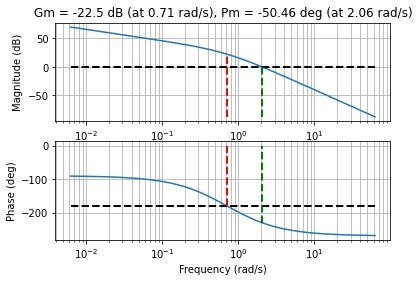

In [15]:
# inline para graficos sem interacao
# qt para grafico em janela separada com interacao (melhora visualizacao)
%matplotlib inline
#%matplotlib qt
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
s=co.tf('s')
#
# Sistema
G  = 1/(s*(s+1)*(s+0.5))
G1 = K*G
print("G1 = ",G1)
#
# Utiliza a funcao bode mas sem display grafico
# Aproveita informacoes de modulo, fase e frequencia angular
# Geracao da escala da frequencia angular rad/s
omega = np.logspace(0,2,num=100,base=10)
mag,phase,omega = co.bode(G1,dB=True,Plot=False)
# Converte para dB e graus
magdB = 20*np.log10(mag)
phase_deg = phase*180.0/np.pi
# Utiliza a funcao margin() que calcula
# As margens de estabilidade com suas respetivas freq. de crossover
Gm,Pm,Wcg,Wcp = co.margin(G1)
GmdB = 20*np.log10(Gm)
##Plot Gain and Phase
f, (ax1,ax2) = plt.subplots(2,1)
ax1.semilogx(omega,magdB)
ax1.grid(which="both")
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax2.semilogx(omega,phase_deg)
ax2.grid(which="both")
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')
ax1.set_title('Gm = '+str(np.round(GmdB,2))+' dB (at '+str(np.round(Wcg,2))+' rad/s), Pm = '+str(np.round(Pm,2))+' deg (at '+str(np.round(Wcp,2))+' rad/s)')
###Plot the zero dB line
ax1.plot(omega,0*omega,'k--',lineWidth=2)
###Plot the -180 deg lin
ax2.plot(omega,-180+0*omega,'k--',lineWidth=2)
##Plot the vertical line from -180 to 0 at Wcg
ax2.plot([Wcg,Wcg],[-180,0],'r--',lineWidth=2)
##Plot the vertical line from -180+Pm to 0 at Wcp
ax2.plot([Wcp,Wcp],[-180+Pm,0],'g--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0-GmdB at Wcg
ax1.plot([Wcg,Wcg],[np.min(magdB),0-GmdB],'r--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0db at Wcp
ax1.plot([Wcp,Wcp],[np.min(magdB),0],'g--',lineWidth=2)


## Passo 3: Escolha da frequência de canto $\omega_z=1/T$

Para evitar os efeitos do atraso de fase do controlador a posição da frequência de canto correspondente ao zero do controlador é escolhido de uma oitava (metade) a uma década (dez vezes menor) abaixo da frequência de crossover
$\omega_{cp}$ escolhida.

Indique abaixo a frequência escolhida:

Escolhendo um fator de 10 vezes menor:
$$
\omega_z=1/T=0.0232
$$

**Obs: utilize o script abaixo**

In [16]:
omegaz = 0.0232
print("omegaz = ",omegaz)
T = 1/omegaz
print("T = ",T)

omegaz =  0.0232
T =  43.10344827586207


## Passo 4: Determinação de $\beta$

Determinar a atenuação do controlador para que na frequência de crossover escolhida $\omega_{cp}$ o sistema compensado $G_c(s)G(s)$ tenha ganho $0$ dB.

Ou seja, $|G_c(j\omega_{cp})/K|$ deve ser o mesmo que $|G_1(j\omega_{cp})|$ com sinal  oposto.
Essa atenuação pode ser estimada como $-20\log \beta$.

-$|G_1(j\omega_{cp})|=|G_c(j\omega_{cp})/K|= -20\log \beta$


Indique abaixo

$$
\beta = 858.025
$$
e
$$
\omega = 1/(\beta T)= 0.000027 rad/s
$$

**Obs: utilize o script abaixo**

In [30]:
# x é igual a -|G1(jwcp)|
x= -58.67
beta = 10**(-x/20)
print("beta = ",beta)
w = 1/(beta*T)
print("w = ", w)

beta =  858.025114722603
w =  2.703883557942298e-05


## Passo 5: Constante $K_c$

O valor de $K_c$ pode ser determinado através de:

$$
K_c = \frac{K}{\beta}
$$

**Obs: utilize o script abaixo**

In [18]:
Kc=K/beta
print("Kc = ",Kc)

Kc =  0.011654670508371974


## Passo 6: Controlador $Gc(s)$

Podemos agora definir o controlador
$$
G_c(s) = K_c \beta \frac{Ts+1}{\beta Ts+1} =K \frac{Ts+1}{\beta Ts+1}
$$
e
$$
G_c(s)/K = \frac{Ts+1}{\beta Ts+1}
$$

**Obs: utilize o script abaixo**

In [19]:
Gc = K*(T*s+1)/(beta*T*s+1)
print("Gc = ",Gc)
Gck = Gc/K
print("Gck = ",Gck)

Gc =  
  431 s + 10
---------------
3.698e+04 s + 1

Gck =  
   431 s + 10
----------------
3.698e+05 s + 10



## Passo 6: Verificação

a) Domínio da frequência:

Para observar o resultado no domínio da frequência colocaremos em um único gráfico o Diagrama de Bode de 3 sistemas:
1. $G_1(s)=KG(s)$: a margem de fase é inicialmente medida nesse sistema,
2. $G_c(s)/K$: o ganho de compensação na frequência de crossover é medido nesse sistema,
3. $Gc(s)G(s)$: sistema compensado.

verifique no diagrama de Bode a Margem de Ganho $G_m$, a frequência de crossover de ganho $\omega_{cg}$, a Margem de Fase $P_m$ do sistema compensado $G_c(s)G(s)$, a frequência de crossover de fase $\omega_{cp}$ e preencha a tabela abaixo:

|$G_m$ | $\omega_{cg}$ | $Pm$ | $\omega_{cp}$ |
|:--|:--|:--|:--|
| 35.55 | 0.03 rad/s | 46.85 | 0.68 rad/s |

**Obs: utilize o script abaixo**

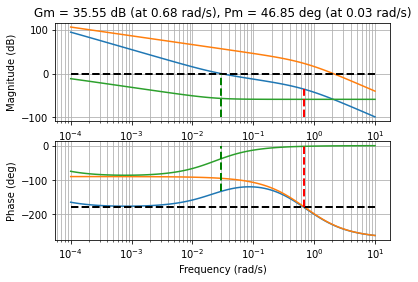

In [20]:
#%matplotlib qt
%matplotlib inline
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
s=co.tf('s')
#
# Sistema
# G1 ja deve estar definido nas celulas acima
#
# Controlador Gck = Gc/K
#
# Malha aberta
openloop = Gc*G
#
# Geracao da escala da frequencia angular rad/s
# 10**fi ---> 10**ff
fi=-4
ff=1
omega = np.logspace(fi,ff,num=100,base=10)
# Utiliza a funcao bode mas sem display grafico
# Aproveita informacoes de modulo, fase
# a escala omega e' imposta 
mag,phase,omega1 = co.bode(openloop,omega,dB=True,Plot=False)
# Converte para dB e graus
magdB = 20*np.log10(mag)
phase_deg = phase*180.0/np.pi
#
# Utiliza a funcao margin() que calcula
# as margens de estabilidade com suas respetivas freq. de crossover
# de Gc(s)G(s)=openloop
Gm,Pm,Wcg,Wcp = co.margin(openloop)
# Converte para dB
GmdB = 20*np.log10(Gm)
#
# Diagrama de Bode de G1
#
magg1,phaseg1,omega1 = co.bode(G1,omega,dB=True,Plot=False)
# Converte para dB e graus
magg1dB = 20*np.log10(magg1)
phaseg1_deg = phaseg1*180.0/np.pi
#
# Diagrama de Bode de Gc(s)/K
#
maggck,phasegck,omega1 = co.bode(Gck,omega,dB=True,Plot=False)
# Converte para dB e graus
maggckdB = 20*np.log10(maggck)
phasegck_deg = phasegck*180.0/np.pi
#
# Coloca tudo no grafico
# G1(s), Gc(s)/K, Gc(s)G(s)
#
f, (ax1,ax2) = plt.subplots(2,1)
ax1.semilogx(omega,magdB,omega,magg1dB,omega,maggckdB)
ax1.grid(which="both")
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax2.semilogx(omega,phase_deg,omega,phaseg1_deg,omega,phasegck_deg)
ax2.grid(which="both")
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')
ax1.set_title('Gm = '+str(np.round(GmdB,2))+' dB (at '+str(np.round(Wcg,2))+' rad/s), Pm = '+str(np.round(Pm,2))+' deg (at '+str(np.round(Wcp,2))+' rad/s)')
#
# linhas auxiliares no grafico
#
###Plot the zero dB line
ax1.plot(omega,0*omega,'k--',lineWidth=2)
###Plot the -180 deg lin
ax2.plot(omega,-180+0*omega,'k--',lineWidth=2)
##Plot the vertical line from -180 to 0 at Wcg
ax2.plot([Wcg,Wcg],[-180,0],'r--',lineWidth=2)
##Plot the vertical line from -180+Pm to 0 at Wcp
ax2.plot([Wcp,Wcp],[-180+Pm,0],'g--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0-GmdB at Wcg
ax1.plot([Wcg,Wcg],[np.min(magdB),0-GmdB],'r--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0db at Wcp
ax1.plot([Wcp,Wcp],[np.min(magdB),0],'g--',lineWidth=2)

## Continuação passo 6:

**b) Domínio do tempo**

Para o domínio do tempo será comparado o sistema inicial $G(s)$ e o sistema compensado
$G_c(s)G(s)$ ambos em malha fechada:

$$
\frac{Y(s)}{R(s)}=\frac{G(s)}{1+G(s)}
$$
e
$$
\frac{Y(s)}{R(s)}=\frac{Gc(s)G(s)}{1+G_c(s)G(s)}
$$

b-1) Resposta a degrau unitário:

**Obs: utilize o script abaixo**

Anote na tabela a seguir as grandezas tempo de subida $t_r$, tempo de acomodação $t_s$, máximo sobresinal $M_p$ e valor máximo de esforço de controle $\max u(t)$ (Estimar o valor pelo gráfico) para o sistema compensado. Para o sistema não compensado não é possível definir tais grandezas porque o sistema é instável.

|Sistema | $t_r$ | $t_s$ | $M_p$ | $$\max u(t)$$ |
|:--|:--|:--|:--|:--|
| $$\frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$ |37.39 seg|314.78 seg|33.277|0.1|

- Compare as duas soluções.

**O sistema compensado tem uma resposta muito lenta, o que é ruim dependendo da aplicação; porém não apresenta carácter oscilatório e exige muito pouco do sistema de atuação, o que é bom. Em termos de comparação com o sistema não compensado, este é estável e o outro não.**



POLOS E ZEROS DE MALHA FECHADA
-------------
Polos e zeros cloop1
Polos =  [-1.58315637+0.j         0.04157819+0.7936755j  0.04157819-0.7936755j]
Zeros =  []
COEF. DE AMORTECIMENTO E FREQ. NATURAL
_____Polos____________zeta_______omegan
_____Eigenvalue______ Damping___ Frequency_
    -1.583                     1      1.583
   0.04158   +0.7937j   -0.05232     0.7948
   0.04158   -0.7937j   -0.05232     0.7948

POLOS E ZEROS DE MALHA FECHADA
-------------
Polos e zeros cloop2
Polos =  [-1.02138852+0.j         -0.45539875+0.j         -0.01161988+0.02112545j
 -0.01161988-0.02112545j]
Zeros =  [-0.0232]
COEF. DE AMORTECIMENTO E FREQ. NATURAL
_____Polos____________zeta_______omegan
_____Eigenvalue______ Damping___ Frequency_
    -1.021                     1      1.021
   -0.4554                     1     0.4554
  -0.01162  +0.02113j     0.4819    0.02411
  -0.01162  -0.02113j     0.4819    0.02411
-------------
CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop2
tempo de subida tr = 

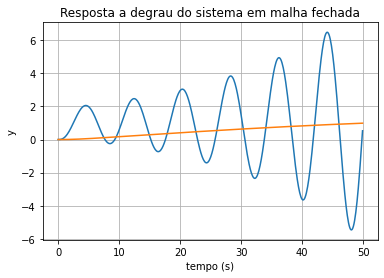

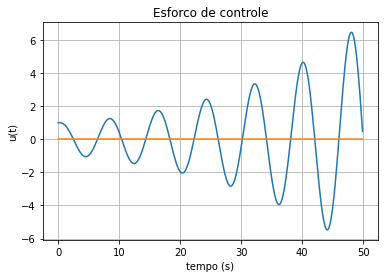

In [28]:
# inline para graficos sem interacao
# qt para grafico em janela separada com interacao
%matplotlib inline
#%matplotlib qt
#
# R(s)  E(s |------|  Y(s)
#---->(+)---| G(s) |------->
#    _ ^    |------|    |
#      |-----------------
#
# R(s)  E(s)|-------|  |------|  Y(s)
#---->(+)---| Gc(s) |--| G(s) |------->
#    _ ^    |-------|  |------|    |
#      |--------------------------- 
#
cloop1 = co.feedback(G,1)
print('\nPOLOS E ZEROS DE MALHA FECHADA')
print('-------------')
print('Polos e zeros cloop1')
print('Polos = ',co.pole(cloop1))
print('Zeros = ',co.zero(cloop1))
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop1)
cloop2 = co.feedback(Gc*G,1)
print('\nPOLOS E ZEROS DE MALHA FECHADA')
print('-------------')
print('Polos e zeros cloop2')
print('Polos = ',co.pole(cloop2))
print('Zeros = ',co.zero(cloop2))
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop2)
S2 = co.stepinfo(cloop2)
S2 = co.stepinfo(cloop2)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop2')
print('tempo de subida tr = ','%.2f' % S2['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % S2['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',S2['Overshoot'])
print('valor de pico ymax = ','%.2f' % S2['Peak'])
print('instante de pico tp = ','%.2f' % S2['PeakTime'],'seg')
print('valor de regime estacionario yss = ','%.2f' % S2['SteadyStateValue'])
# base de tempo t
plt.figure(1)
t=[x*0.1 for x in range(0,500)]
y1, t = co.step(cloop1,t)
y2, t = co.step(cloop2,t)
plt.plot(t,y1,t,y2)
plt.title('Resposta a degrau do sistema em malha fechada')
plt.xlabel('tempo (s)')
plt.ylabel('y')
plt.grid()
# Calcula as caracteristicas da resposta transitoria
#  S: a dictionary containing:
#        RiseTime: Time from 10% to 90% of the steady-state value.
#        SettlingTime: Time to enter inside a default error of 2%
#        SettlingMin: Minimum value after RiseTime
#        SettlingMax: Maximum value after RiseTime
#        Overshoot: Percentage of the Peak relative to steady value
#        Undershoot: Percentage of undershoot
#        Peak: Absolute peak value
#        PeakTime: time of the Peak
#        SteadyStateValue: Steady-state value
# Esforco de controle
esforco1 = co.feedback(1,G)
esforco2 = co.feedback(Gc,G)
vp1, t = co.step(esforco1,t)
vp2, t = co.step(esforco2,t)
Se = co.stepinfo(esforco2)
# a escala do grafico tava muito alta para determinar o esforco de controle máx
# entao fiz o stepinfo e peguei o ymax
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA esforco2')
print('tempo de subida tr = ','%.2f' % Se['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % Se['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',Se['Overshoot'])
print('valor de pico ymax = ','%.2f' % Se['Peak'])
print('instante de pico tp = ','%.2f' % Se['PeakTime'],'seg')
print('valor de regime estacionario yss = ','%.2f' % Se['SteadyStateValue'])
plt.figure(2)
plt.plot(t,vp1,t,vp2)
plt.title('Esforco de controle')
plt.xlabel('tempo (s)')
plt.ylabel('u(t)')
plt.grid()

b-2) Resposta a rampa:

**Obs: utilize o script abaixo**

- O erro estático $e_{ss}$ não é nulo. Justifique.


**O sistema teria que ter dois polos na origem para ter $e_{ss}$ nulo para uma entrada em rampa. Pois com um pólo na origem apenas, $K_v$ assume um valor real constante, nesse exercício $K_v$ = 20. Logo  $e_{ss} = \frac{1}{20}$**


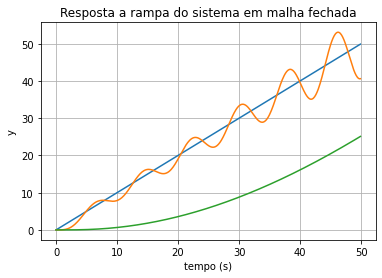

In [29]:
# inline para graficos sem interacao
# qt para grafico em janela separada com interacao
%matplotlib inline
#%matplotlib qt
# Calculo da resposta a rampa
#t=[x*0.05 for x in range(0,50)]
u = t.copy()
y1, tempo, x1 = co.lsim(cloop1,u,t)
y2, tempo, x2 = co.lsim(cloop2,u,t)
plt.plot(t,u,t,y1,t,y2)
plt.title('Resposta a rampa do sistema em malha fechada')
plt.xlabel('tempo (s)')
plt.ylabel('y')
plt.grid()